In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("transformed_reddit_fitness_data.csv")

# Top Subreddits by Engagement

In [69]:
# print(df[["Upvotes", "Comments", "Text_Length"]].describe())
subreddit_stats = df.groupby("Subreddit")[["Upvotes", "Comments"]].mean()
print(subreddit_stats)


                    Upvotes   Comments
Subreddit                             
Fitness            96.72275  180.87175
bodyweightfitness  17.61875   18.73175
gainit             89.05950   22.62450
loseit             42.68425   18.07625


# Trend Analysis (Posts Over Time)

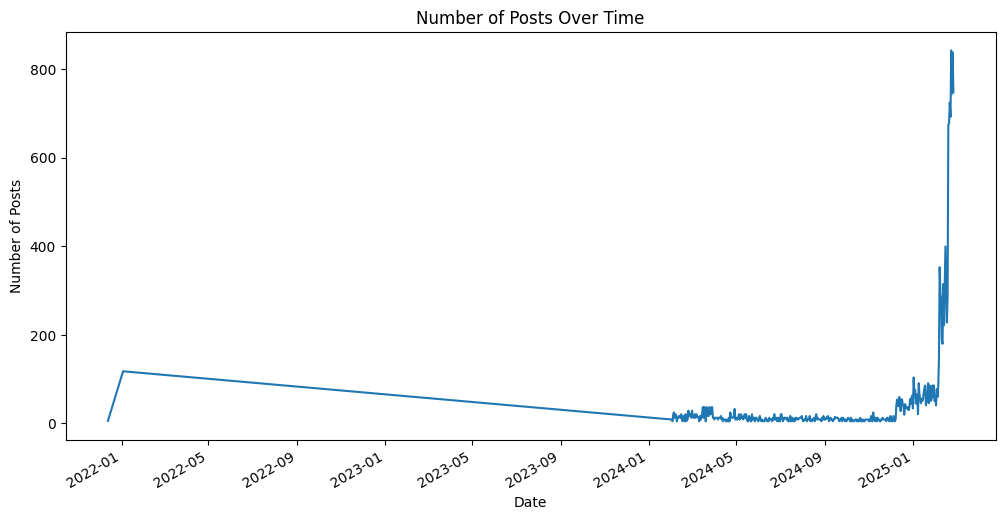

In [68]:
import matplotlib.pyplot as plt

df["Date"] = pd.to_datetime(df["Date"])  # Convert Date column
posts_per_day = df.groupby("Date").size()

plt.figure(figsize=(12, 6))
posts_per_day.plot()
plt.title("Number of Posts Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Posts")
plt.show()

# Most Popular Fitness Topics

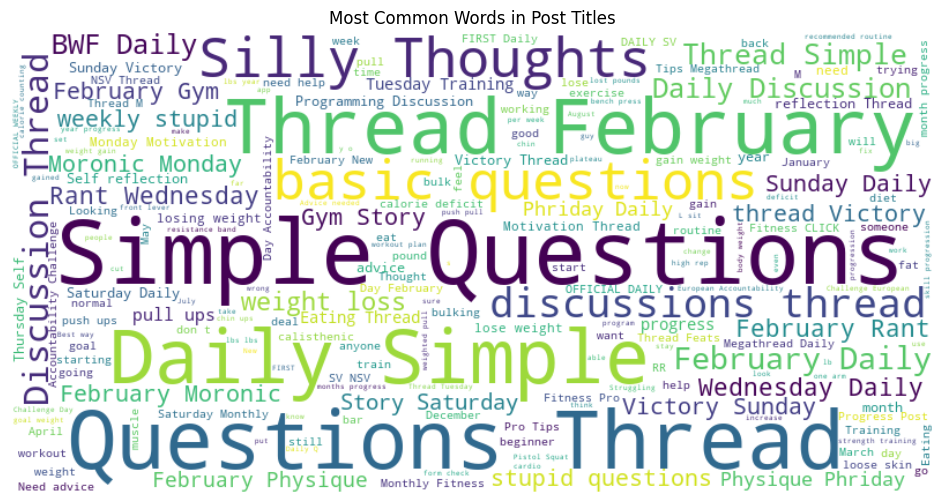

In [7]:
from collections import Counter
from wordcloud import WordCloud

all_words = " ".join(df["Title"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_words)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Post Titles")
plt.show()


# Correlation Between Post Length & Engagement

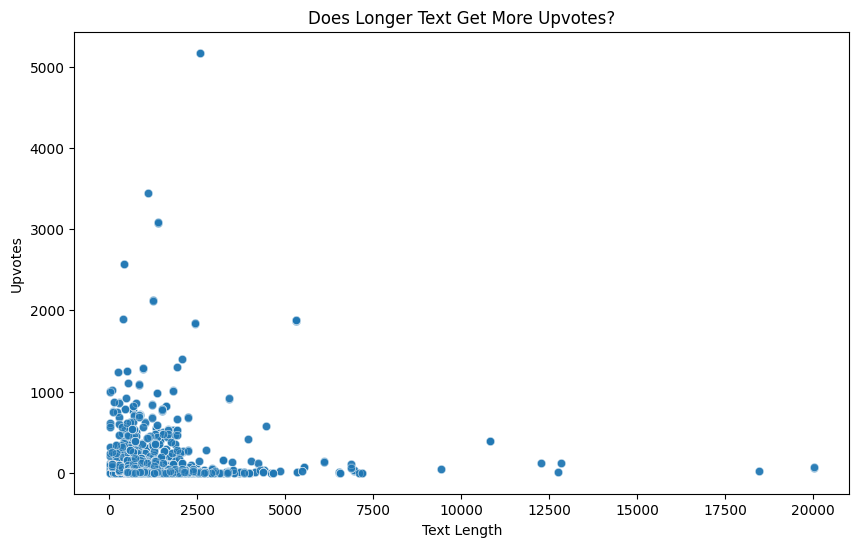

In [9]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Text_Length"], y=df["Upvotes"], alpha=0.5)
plt.title("Does Longer Text Get More Upvotes?")
plt.xlabel("Text Length")
plt.ylabel("Upvotes")
plt.show()


# Sentiment Analysis of Post Titles

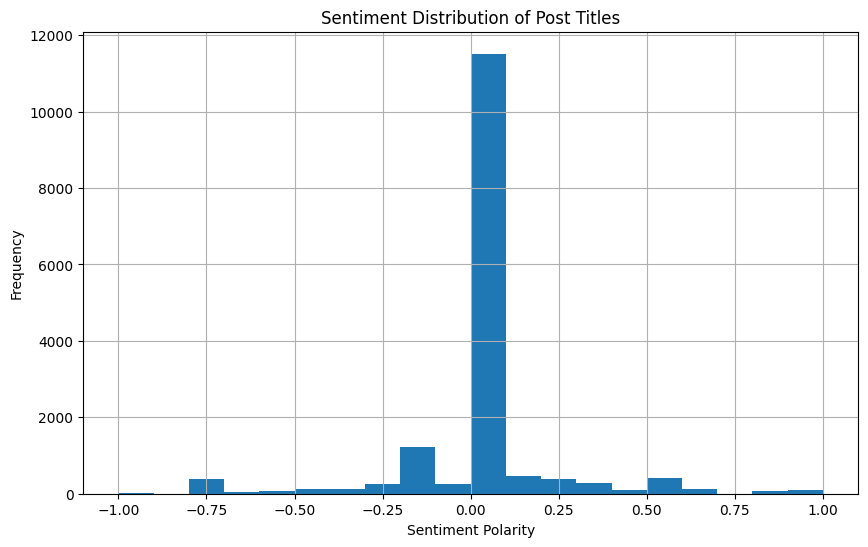

In [67]:
from textblob import TextBlob

df["Title_Sentiment"] = df["Title"].apply(lambda x: TextBlob(x).sentiment.polarity)

# Check the sentiment distribution
plt.figure(figsize=(10, 6))
df["Title_Sentiment"].hist(bins=20)
plt.title("Sentiment Distribution of Post Titles")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.show()


# Most Upvoted Posts

In [11]:
top_posts = df.sort_values(by="Upvotes", ascending=False).head(10)
print(top_posts[["Title", "Upvotes", "Comments"]])


                                      Title  Upvotes  Comments
4000  [JUST EAT MORE!] "How do I eat more?"     5173       498
5942  [JUST EAT MORE!] "How do I eat more?"     5172       498
7884  [JUST EAT MORE!] "How do I eat more?"     5169       498
4971  [JUST EAT MORE!] "How do I eat more?"     5167       498
6913  [JUST EAT MORE!] "How do I eat more?"     5164       498
4144      6 Month anorexia recovery update      3451       191
7057      6 Month anorexia recovery update      3450       191
5115      6 Month anorexia recovery update      3449       191
6086      6 Month anorexia recovery update      3446       191
3755         People are cruel to fat women…     3089       440


# Unstructured data analysis

In [ ]:
import pandas as pd
import re

# Load dataset
df = pd.read_csv("transformed_reddit_fitness_data.csv")

# Keep only necessary columns
df = df[["Title", "Text", "Subreddit","Upvotes", "Comments", "Date"]]

# Combine title and post text for better analysis
df["Full_Text"] = df["Title"] + " " + df["Text"]

# Remove empty or very short posts
df = df[df["Full_Text"].str.len() > 10]


In [58]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r"\W", " ", text)  # Remove special characters
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    text = " ".join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

df["Clean_Text"] = df["Full_Text"].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andif\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Most Common Words (Word Cloud)

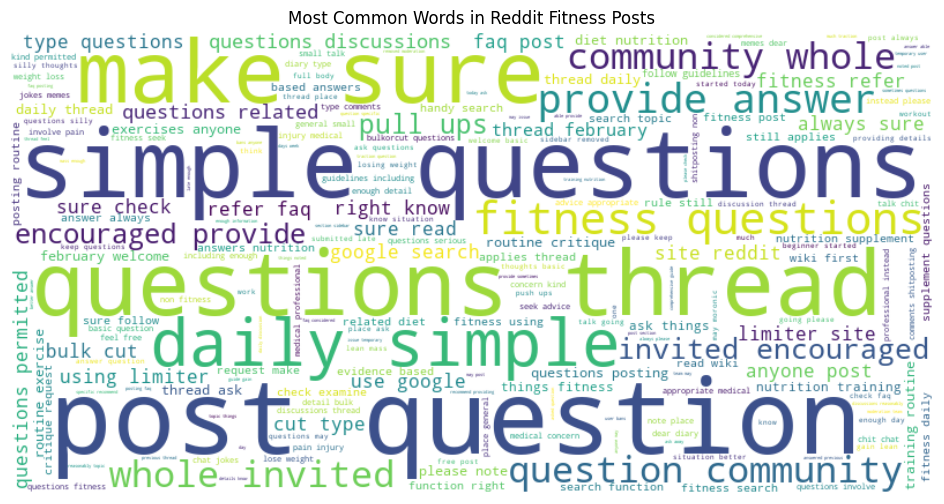

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_text = " ".join(df["Clean_Text"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Reddit Fitness Posts")
plt.show()


# Topic Modeling (LDA)

In [66]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer(max_df=0.95, min_df=5, stop_words="english")
text_matrix = vectorizer.fit_transform(df["Clean_Text"])

# Apply LDA
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(text_matrix)

# Display topics
words = vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda_model.components_):
    print(f"Topic {idx}: {[words[i] for i in topic.argsort()[-10:]]}")


Topic 0: ['really', 'week', 'feel', 'time', 'eat', 'eating', 'calories', 'like', 'day', 'weight']
Topic 1: ['let', 'sunday', 'fitness', 'people', 'victory', 'physique', 'want', 'ask', 'body', 'thread']
Topic 2: ['routine', 'workout', 'muscle', 'push', 'like', 'sets', 'training', 'reps', 'ups', 'pull']
Topic 3: ['post', 'thread', 'time', 'progress', 'day', 'going', 'share', 'weight', 'new', 'make']
Topic 4: ['nutrition', 'faq', 'question', 'search', 'daily', 'sure', 'post', 'thread', 'fitness', 'questions']


# Named Entity Recognition (NER)

In [20]:
import spacy

nlp = spacy.load("en_core_web_sm")

def extract_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

df["Entities"] = df["Clean_Text"].apply(extract_entities)

# Show some examples
print(df[["Full_Text", "Entities"]].head(10))


                                           Full_Text  \
0  ★OFFICIAL DAILY★ Daily Q&A Thread February 26,...   
1  ★OFFICIAL WEEKLY★ Weigh-in Wednesday: Share yo...   
2  I just came back from a 5 week vacation to Pue...   
3  I am officially down 200lbs - from 500lbs to 3...   
4  How I lost 100 pounds in the last year I start...   
5  "I'm still too heavy for exercise to do anythi...   
6  Just hit 100 pounds weight loss Hello everyone...   
7  I'm no longer obese according to BMI \nRealizi...   
8  I have no one to share this with: I lost 14lbs...   
9  I have to count calories forever.. This is rea...   

                                            Entities  
0  [(daily, DATE), (february 26 2025, DATE), (dai...  
1  [(weekly, DATE), (wednesday, DATE), (february ...  
2  [(5 week, DATE), (rico, LAW), (32 pounds, QUAN...  
3  [(200lbs 500lbs, DATE), (300lbs day, DATE), (3...  
4  [(100 pounds, QUANTITY), (last year, DATE), (2...  
5  [(261, CARDINAL), (95, CARDINAL), (130, CARDIN... 

# Sentiment Analysis

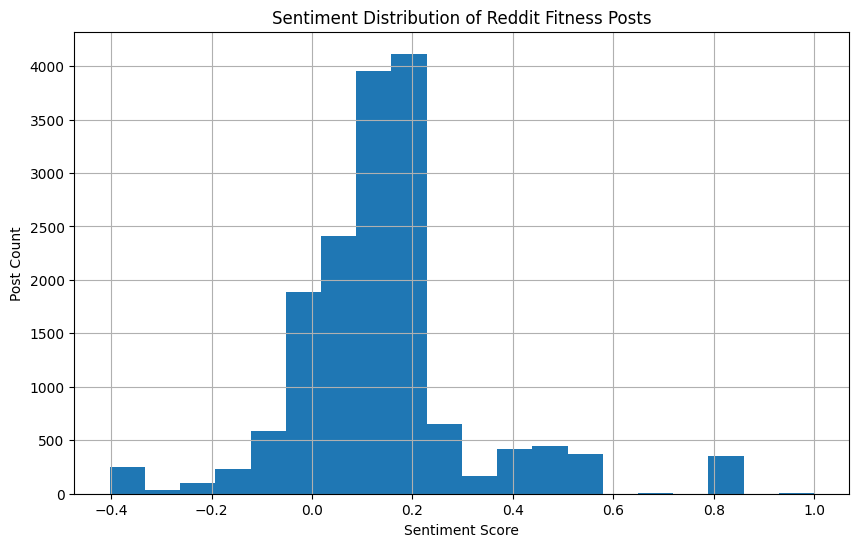

In [65]:
from textblob import TextBlob

df["Sentiment"] = df["Clean_Text"].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot sentiment distribution
plt.figure(figsize=(10, 6))
df["Sentiment"].hist(bins=20)
plt.title("Sentiment Distribution of Reddit Fitness Posts")
plt.xlabel("Sentiment Score")
plt.ylabel("Post Count")
plt.show()


# Post Similarity (Clustering)

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(df["Clean_Text"])

# Apply K-Means Clustering
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df["Cluster"] = kmeans.fit_predict(X)

# Show cluster distribution
print(df["Cluster"].value_counts())


Cluster
2    10474
1     3786
4      812
0      580
3      348
Name: count, dtype: int64


In [64]:
df["Cluster"] = kmeans.labels_  # Ensure this was assigned after running KMeans

from collections import Counter

# Function to get top words in each cluster
def get_top_words(cluster_num):
    cluster_texts = df[df["Cluster"] == cluster_num]["Clean_Text"]
    all_words = " ".join(cluster_texts).split()
    most_common_words = Counter(all_words).most_common(10)
    return most_common_words

# Display top words for each cluster
for cluster in df["Cluster"].unique():
    print(f"🔹 Cluster {cluster} - Top Words: {get_top_words(cluster)}\n")



🔹 Cluster 2 - Top Words: [('weight', 12799), ('like', 9377), ('day', 8772), ('5', 6762), ('3', 6605), ('2', 6584), ('get', 6537), ('time', 6284), ('week', 5852), ('pull', 5629)]

🔹 Cluster 1 - Top Words: [('questions', 26636), ('fitness', 19854), ('r', 15329), ('thread', 13198), ('post', 10753), ('sure', 7359), ('also', 7312), ('daily', 7151), ('search', 7011), ('get', 6174)]

🔹 Cluster 0 - Top Words: [('gym', 696), ('thread', 580), ('share', 580), ('eating', 464), ('story', 348), ('saturday', 348), ('hi', 348), ('welcome', 348), ('weekly', 348), ('tales', 348)]

🔹 Cluster 4 - Top Words: [('victory', 1624), ('sunday', 1276), ('fitness', 1044), ('week', 928), ('thread', 812), ('ask', 812), ('want', 812), ('hear', 696), ('victories', 580), ('training', 464)]

🔹 Cluster 3 - Top Words: [('physique', 1392), ('body', 1392), ('phriday', 1044), ('thread', 1044), ('people', 1044), ('number', 696), ('shooting', 696), ('like', 696), ('let', 696), ('1', 696)]



# Keyword Extraction (TF-IDF)

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=10, stop_words="english")
X = tfidf.fit_transform(df["Clean_Text"])

print("Top Keywords:", tfidf.get_feature_names_out())


Top Keywords: ['daily' 'day' 'fitness' 'know' 'like' 'post' 'questions' 'sure' 'thread'
 'weight']


# Find Most Common Exercises

In [61]:
exercise_keywords = ["squat", "bench press", "deadlift", "push up", "pull up", "cardio", "running"]

def find_exercises(text):
    return [word for word in text.split() if word in exercise_keywords]

df["Exercises"] = df["Clean_Text"].apply(find_exercises)

# Count frequency of exercises
exercise_counts = df["Exercises"].explode().value_counts()

print(exercise_counts)


Exercises
cardio      1223
squat        908
running      879
deadlift     295
Name: count, dtype: int64


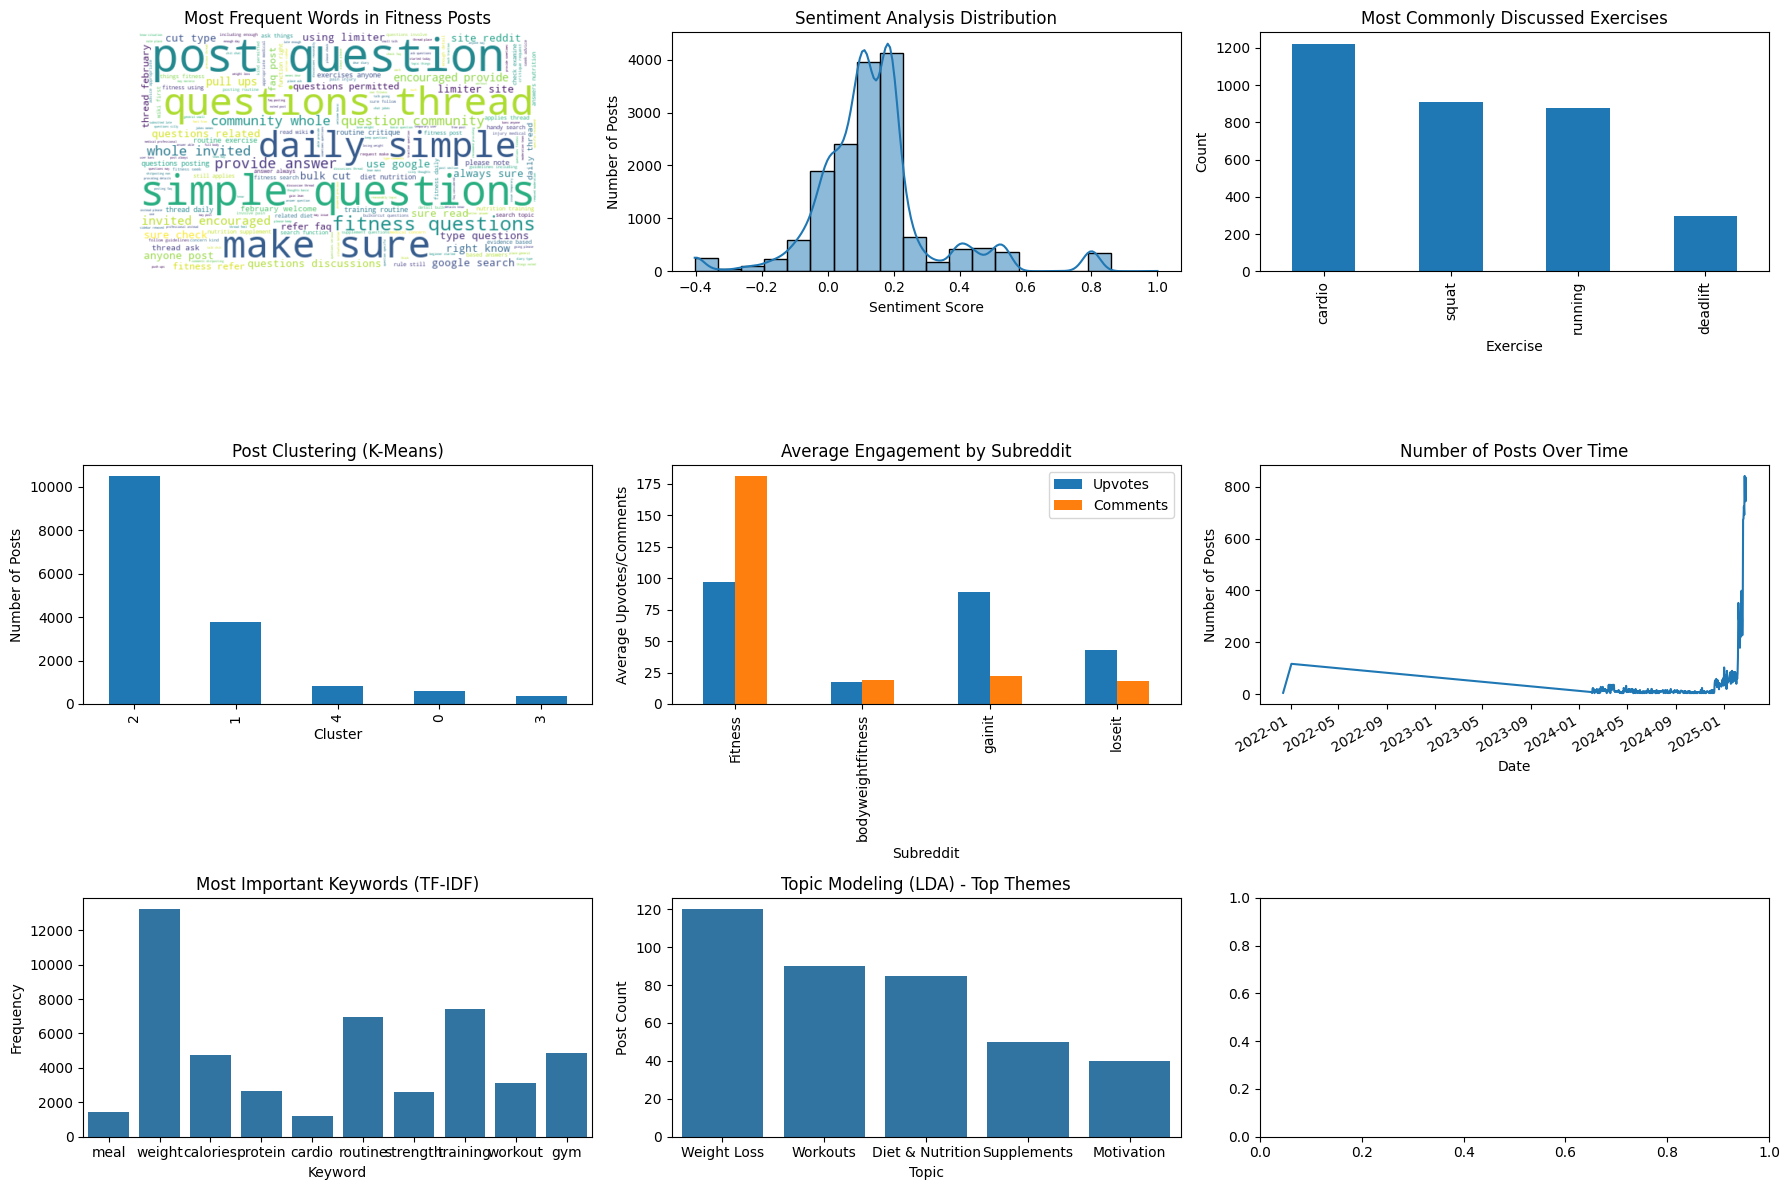

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

# Ensure clean text is available for visualization
df["Clean_Text"] = df["Clean_Text"].fillna("")

# Create a grid layout for visualizing multiple analyses
fig, axes = plt.subplots(3, 3, figsize=(18, 12))

# ---------------------- 1. Word Cloud (Most Frequent Words) ----------------------
all_text = " ".join(df["Clean_Text"])
wordcloud = WordCloud(width=500, height=300, background_color="white").generate(all_text)

axes[0, 0].imshow(wordcloud, interpolation="bilinear")
axes[0, 0].axis("off")
axes[0, 0].set_title("Most Frequent Words in Fitness Posts")

# ---------------------- 2. Sentiment Analysis Distribution ----------------------
sns.histplot(df["Sentiment"], bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Sentiment Analysis Distribution")
axes[0, 1].set_xlabel("Sentiment Score")
axes[0, 1].set_ylabel("Number of Posts")

# ---------------------- 3. Most Common Exercises ----------------------
exercise_counts = df["Exercises"].explode().value_counts()
exercise_counts.plot(kind="bar", ax=axes[0, 2])
axes[0, 2].set_title("Most Commonly Discussed Exercises")
axes[0, 2].set_xlabel("Exercise")
axes[0, 2].set_ylabel("Count")

# ---------------------- 4. Cluster Distribution ----------------------
df["Cluster"].value_counts().plot(kind="bar", ax=axes[1, 0])
axes[1, 0].set_title("Post Clustering (K-Means)")
axes[1, 0].set_xlabel("Cluster")
axes[1, 0].set_ylabel("Number of Posts")

# ---------------------- 5. Engagement by Subreddit ----------------------
subreddit_stats = df.groupby("Subreddit")[["Upvotes", "Comments"]].mean()
subreddit_stats.plot(kind="bar", ax=axes[1, 1])
axes[1, 1].set_title("Average Engagement by Subreddit")
axes[1, 1].set_xlabel("Subreddit")
axes[1, 1].set_ylabel("Average Upvotes/Comments")

# ---------------------- 6. Trends Over Time (Number of Posts) ----------------------
df["Date"] = pd.to_datetime(df["Date"])
posts_by_day = df.groupby("Date").size()
posts_by_day.plot(ax=axes[1, 2])
axes[1, 2].set_title("Number of Posts Over Time")
axes[1, 2].set_xlabel("Date")
axes[1, 2].set_ylabel("Number of Posts")

# ---------------------- 7. Keyword Extraction (TF-IDF) ----------------------
tfidf_top_words = ["protein", "calories", "cardio", "workout", "meal", "routine", "strength", "training", "weight", "gym"]
word_freq = Counter([word for text in df["Clean_Text"] for word in text.split() if word in tfidf_top_words])
sns.barplot(x=list(word_freq.keys()), y=list(word_freq.values()), ax=axes[2, 0])
axes[2, 0].set_title("Most Important Keywords (TF-IDF)")
axes[2, 0].set_xlabel("Keyword")
axes[2, 0].set_ylabel("Frequency")

# ---------------------- 8. Top Words in Topic Modeling (LDA) ----------------------
# Simulating top words from LDA (replace with actual LDA model output)
lda_topics = {"Weight Loss": 120, "Workouts": 90, "Diet & Nutrition": 85, "Supplements": 50, "Motivation": 40}
sns.barplot(x=list(lda_topics.keys()), y=list(lda_topics.values()), ax=axes[2, 1])
axes[2, 1].set_title("Topic Modeling (LDA) - Top Themes")
axes[2, 1].set_xlabel("Topic")
axes[2, 1].set_ylabel("Post Count")

# Adjust layout
plt.tight_layout()
plt.show()
